In [1]:
import pandas as pd
import plotly.express as maria # You can give the imported package any name you choose. Most of the times you see that that some logical name is chosen, like px for plotly.express
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/businessdatasolutions/courses/main/data%20mining/gitbook/datasets/breastcancer.csv"
rawDF = pd.read_csv(url)
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

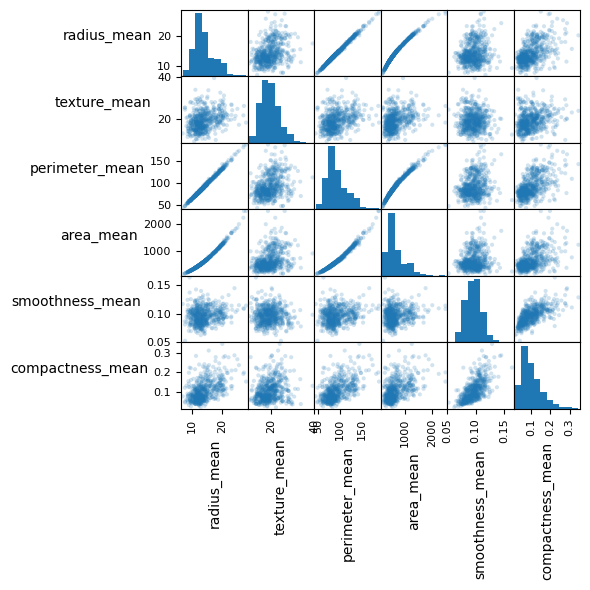

In [3]:


selDF = rawDF.filter(regex="mean").iloc[:, :6]
fig = scatter_matrix(selDF, alpha=0.2, figsize=(6, 6), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [4]:
cleanDF = rawDF.drop(["id"], axis=1) #Different name for changed data. So we can work with both at the same time
cleanDF.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
cntDiag = cleanDF["diagnosis"].value_counts()
propDiag = cleanDF["diagnosis"].value_counts(normalize=True)
cntDiag

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
propDiag

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [7]:
catType = CategoricalDtype(categories=["B", "M"], ordered=False)
cleanDF["diagnosis"] = cleanDF["diagnosis"].astype(catType)
cleanDF["diagnosis"]

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['B', 'M']

In [8]:
cleanDF[["radius_mean", "area_mean", "smoothness_mean"]].describe()

,radius_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.096360
std,3.524049,351.914129,0.014064
min,6.981000,143.500000,0.052630
25%,11.700000,420.300000,0.086370
50%,13.370000,551.100000,0.095870
75%,15.780000,782.700000,0.105300
max,28.110000,2501.000000,0.163400


In [9]:
def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    )  # distance of item value - minimum vector value divided by the range of all vector values


testSet1 = np.arange(1, 6)
testSet2 = np.arange(1, 6) * 10


print(f"testSet1: {testSet1}\n")

testSet1: [1 2 3 4 5]



In [10]:
print(f"testSet2: {testSet2}\n")
print(f"Normalized testSet1: {normalize(testSet1)}\n")
print(f"Normalized testSet2: {normalize(testSet2)}\n")


testSet2: [10 20 30 40 50]

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]

Normalized testSet2: [0.   0.25 0.5  0.75 1.  ]



In [11]:
excluded = ["diagnosis"]  # list of columns to exclude
# X = cleanDF.loc[:, ~cleanDF.columns.isin(excluded)]
X = cleanDF.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
X[["radius_mean", "area_mean", "smoothness_mean"]].describe()

,radius_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000
mean,0.338222,0.216920,0.394785
std,0.166787,0.149274,0.126967
min,0.000000,0.000000,0.000000
25%,0.223342,0.117413,0.304595
50%,0.302381,0.172895,0.390358
75%,0.416442,0.271135,0.475490
max,1.000000,1.000000,1.000000


In [12]:
y = cleanDF["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

for each instance in the test set:
    for each instance in the training set:
        calculate the distance between the two instances
    sort the distances in ascending order
    find the K nearest neighbors
    predict the class based on the majority class among the K nearest neighbors

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.iloc[:,:15], y_train)
# # make predictions on the test set

KNeighborsClassifier()

In [14]:
y_pred = knn.predict((X_test.iloc[:,:15]))

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[104,   6],
       [  2,  59]])

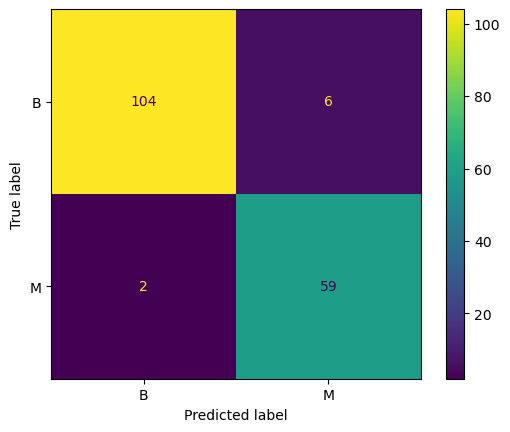

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [17]:
plt.show()